In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data=pd.read_csv("E:\Datasets\Fish.csv")

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
data.describe(include='object')

,Species
count,159
unique,7
top,Perch
freq,56


In [8]:
s=data['Species'].unique()
s

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cout Plot of Species Of Fish')

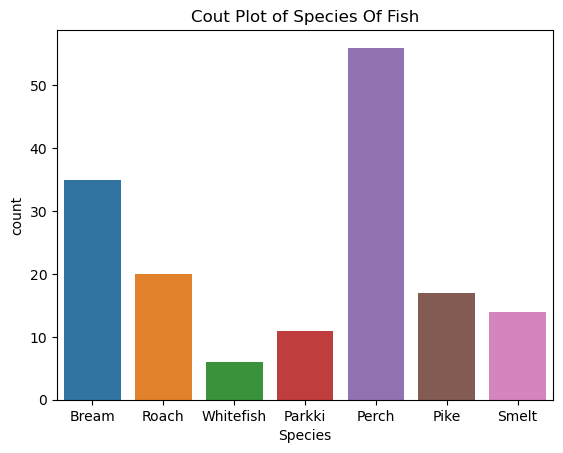

In [9]:
sns.countplot('Species',data=data)
plt.title("Cout Plot of Species Of Fish")


<AxesSubplot:>

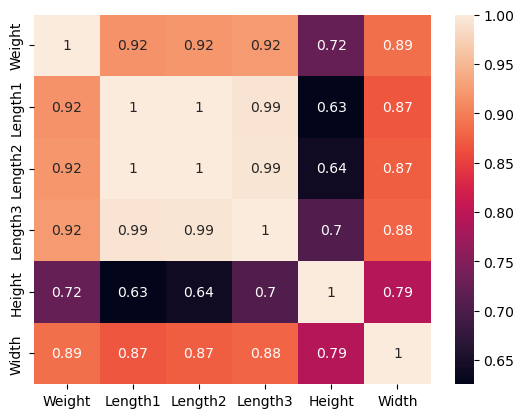

In [10]:
df=data.iloc[:,1:]
sns.heatmap(data.corr(),annot=True)
# data.corr()



In [11]:
x=data.iloc[:,2:].values
y=data.iloc[:,1].values

In [12]:
print(x.shape)
print(y.shape)

(159, 5)
(159,)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)


In [15]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred= regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 184.37  160.  ]
 [ 545.15  500.  ]
 [ 949.31 1000.  ]
 [ 598.18  600.  ]
 [ 472.28  390.  ]
 [ 712.68  700.  ]
 [ 849.99  770.  ]
 [ 364.17  290.  ]
 [-147.2    13.4 ]
 [ 292.79  180.  ]
 [ 786.74  955.  ]
 [ -98.83   32.  ]
 [ 680.14  720.  ]
 [ 772.89 1000.  ]
 [ 766.26  650.  ]
 [ 165.67  130.  ]
 [ 136.58  110.  ]
 [ 148.37    0.  ]
 [ 696.86  800.  ]
 [ 356.71  265.  ]
 [ 514.06  390.  ]
 [ 851.8   925.  ]
 [ 152.96  130.  ]
 [-178.3     9.7 ]
 [ 200.17  140.  ]
 [ -84.12   19.9 ]
 [ 885.75 1000.  ]
 [ 632.71  575.  ]
 [ 708.28  850.  ]
 [  50.15  100.  ]
 [ 390.15  200.  ]
 [-161.02    9.9 ]]


In [17]:
print("Train Accuracy:", regressor.score(x_train,y_train))
print("Train Accuracy:", regressor.score(x_test,y_test))

Train Accuracy: 0.8805169500147534
Train Accuracy: 0.9001235497690088


In [19]:
from sklearn.metrics import r2_score
r2=r2_score(y_pred,y_test)
r2

0.8954100039412451

In [20]:
regressor.score(x_test,y_test)

0.9001235497690088

In [25]:
MAE=np.mean(abs(y_test -y_pred))
MAE

94.66620334873913

In [27]:
MAE=np.mean(abs(y_test))
MAE

425.46562500000005

In [30]:
MSE=np.mean((y_test -y_pred)*(y_test -y_pred))
MSE

12283.92862359234

In [32]:
RMSE=np.sqrt(MSE)
RMSE

110.83288602031591

In [33]:
SSE=np.sum((y_test-y_pred)*(y_test-y_pred))
SST=np.sum((y_test-(np.mean(y_test)))*(y_test-(np.mean(y_test))))
r2=1-(SSE/SST)
r2

           

0.9001235497690088

In [39]:
UMAE=np.mean(abs(-(np.mean(y_test))))
UMAE

301.57694203694575

### OneHotEncoder

In [110]:
x=data.iloc[:,[0,2,3,4,5,6]].values
y=data.iloc[:,1].values

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [112]:
x

array([[1.0, 0.0, 0.0, ..., 30.0, 11.52, 4.02],
       [1.0, 0.0, 0.0, ..., 31.2, 12.48, 4.3056],
       [1.0, 0.0, 0.0, ..., 31.1, 12.3778, 4.6961],
       ...,
       [0.0, 0.0, 0.0, ..., 13.8, 2.277, 1.2558],
       [0.0, 0.0, 0.0, ..., 15.2, 2.8728, 2.0672],
       [0.0, 0.0, 0.0, ..., 16.2, 2.9322, 1.8792]], dtype=object)

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)


In [114]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [115]:
y_pred= regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 201.41  160.  ]
 [ 502.56  500.  ]
 [1037.77 1000.  ]
 [ 546.91  600.  ]
 [ 485.59  390.  ]
 [ 749.37  700.  ]
 [ 831.01  770.  ]
 [ 331.16  290.  ]
 [  38.35   13.4 ]
 [ 284.86  180.  ]
 [ 826.8   955.  ]
 [-203.64   32.  ]
 [ 687.95  720.  ]
 [ 759.45 1000.  ]
 [ 823.15  650.  ]
 [ 153.62  130.  ]
 [ 113.98  110.  ]
 [  87.15    0.  ]
 [ 715.61  800.  ]
 [ 365.56  265.  ]
 [ 565.31  390.  ]
 [ 857.8   925.  ]
 [ 122.    130.  ]
 [ -21.4     9.7 ]
 [ 171.12  140.  ]
 [ 166.57   19.9 ]
 [1008.22 1000.  ]
 [ 644.42  575.  ]
 [ 731.16  850.  ]
 [ -12.8   100.  ]
 [ 159.68  200.  ]
 [  12.38    9.9 ]]


In [116]:
print("Train Accuracy:", regressor.score(x_train,y_train))
print("Train Accuracy:", regressor.score(x_test,y_test))

Train Accuracy: 0.9360754332805137
Train Accuracy: 0.9204863749369896


### Label Encoing

In [125]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Species']= labelencoder.fit_transform(data['Species'])

In [132]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [134]:
x=data.iloc[:,[0,2,3,4,5,6]].values
y=data.iloc[:,1].values

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)


In [136]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [137]:
y_pred= regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 215.63  160.  ]
 [ 526.48  500.  ]
 [ 947.47 1000.  ]
 [ 588.56  600.  ]
 [ 431.53  390.  ]
 [ 708.87  700.  ]
 [ 838.86  770.  ]
 [ 330.43  290.  ]
 [-107.51   13.4 ]
 [ 311.89  180.  ]
 [ 827.11  955.  ]
 [-132.47   32.  ]
 [ 677.5   720.  ]
 [ 820.64 1000.  ]
 [ 774.14  650.  ]
 [ 151.98  130.  ]
 [ 164.14  110.  ]
 [ 177.22    0.  ]
 [ 815.18  800.  ]
 [ 342.64  265.  ]
 [ 544.48  390.  ]
 [ 880.87  925.  ]
 [ 144.61  130.  ]
 [-146.3     9.7 ]
 [ 226.27  140.  ]
 [ -39.03   19.9 ]
 [ 898.75 1000.  ]
 [ 613.46  575.  ]
 [ 718.41  850.  ]
 [  26.56  100.  ]
 [ 384.73  200.  ]
 [-132.43    9.9 ]]


In [138]:
print("Train Accuracy:", regressor.score(x_train,y_train))
print("Train Accuracy:", regressor.score(x_test,y_test))

Train Accuracy: 0.8882220982541718
Train Accuracy: 0.9159367039157917
